In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as num

# Train -Test split

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

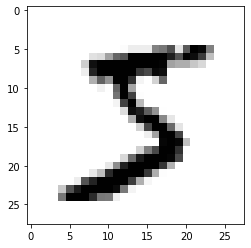

In [4]:
plt.imshow(x_train[0],cmap="binary")

In [5]:
y_train[0]

5

Scale the data

In [6]:
x_val=x_train[:5000]/255.0
x_train=x_train[5000:]/255.0
x_test=x_test/255.0
y_val=y_train[:5000]
y_train=y_train[5000:]

Creating the model

In [7]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                              keras.layers.Dense(300,activation="relu"),
                              keras.layers.Dense(300,activation="relu"), 
                              keras.layers.Dense(10,activation="sigmoid")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
hist_model=model.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1719/1719 [==============================] - 13s 3ms/step - loss: 0.6179 - accuracy: 0.8454 - val_loss: 0.3035 - val_accuracy: 0.9160
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2907 - accuracy: 0.9180 - val_loss: 0.2424 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2379 - accuracy: 0.9326 - val_loss: 0.2062 - val_accuracy: 0.9420
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2022 - accuracy: 0.9424 - val_loss: 0.1780 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1758 - accuracy: 0.9498 - val_loss: 0.1592 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 0.95 - 3s 2ms/step - loss: 0.1549 - accuracy: 0.9561 - val_loss: 0.1407 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1385 - accuracy

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9776


[0.07027944177389145, 0.9775999784469604]

# Visualise the loss and accuracy

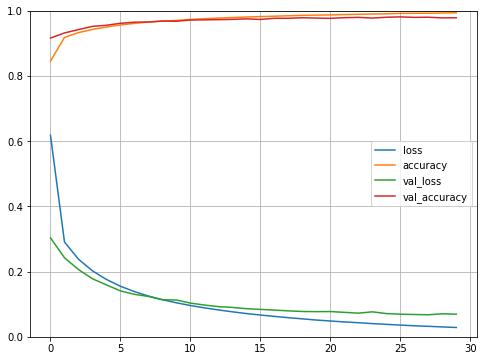

In [11]:
import pandas as pd
pd.DataFrame(hist_model.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
y_predicted=[]
pred=model.predict(x_test)

In [13]:
y_predicted=[num.argmax(i) for i in pred]
y_predicted=num.array(y_predicted)
y_predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
corr=confusion_matrix(y_predicted,y_test)

In [16]:
corr

array([[ 968,    0,    5,    0,    1,    2,    6,    1,    4,    3],
       [   0, 1128,    3,    1,    0,    0,    3,    4,    2,    5],
       [   1,    2, 1008,    4,    6,    0,    0,    9,    3,    0],
       [   1,    1,    1,  991,    0,   10,    1,    4,    7,    8],
       [   1,    0,    2,    0,  961,    2,    5,    1,    3,   12],
       [   3,    1,    0,    5,    0,  866,    3,    0,    5,    1],
       [   2,    1,    3,    0,    3,    6,  939,    0,    4,    1],
       [   1,    1,    6,    3,    3,    1,    1, 1005,    4,    6],
       [   2,    1,    4,    3,    0,    4,    0,    0,  938,    1],
       [   1,    0,    0,    3,    8,    1,    0,    4,    4,  972]],
      dtype=int64)

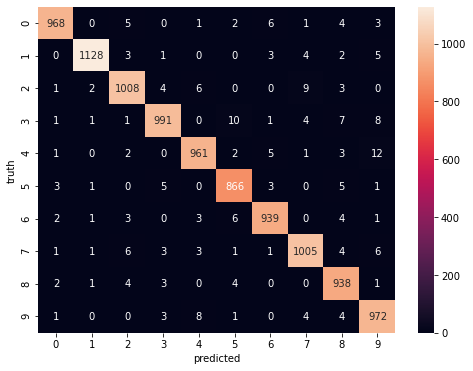

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt="d")
plt.ylabel("truth")
plt.xlabel("predicted")
plt.show()

# Testing our model prediction with users handwritten digit

In [18]:
path=r"C:\Users\user\Downloads\image_1.png"

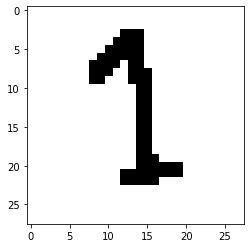

In [19]:
import cv2
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="binary")

In [20]:
img.shape

(28, 28)

In [21]:
img_reshape=img

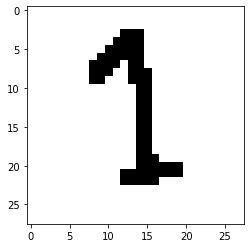

In [22]:
plt.imshow(img_reshape,cmap="binary")

In [23]:
img_reshape.shape

(28, 28)

In [24]:
img_reshape=img_reshape.astype(x_train[0].dtype)
img_reshape.dtype
img_reshape=img_reshape/255.0

In [25]:
ar=num.array([img_reshape])

In [26]:
m=model.predict(ar[:1])
print(num.argmax(m))

1
